In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('austin_traffic.csv')

In [7]:
data.isnull().sum()

Road Name          0
Month              0
Day                0
Year               0
Hour               0
Day of Week        0
Holiday            0
Direction          0
Speed          39624
Volume             0
Full Date          0
dtype: int64

In [9]:
data

,Road Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date
0,BURNET,9,7,2021,23,2,0,NB,42.0,181.0,2021-09-07 23:00:00
1,BURNET,9,7,2021,23,2,0,SB,44.0,112.0,2021-09-07 23:00:00
2,BURNET,9,7,2021,22,2,0,NB,41.0,259.0,2021-09-07 22:00:00
3,BURNET,9,7,2021,22,2,0,SB,43.0,218.0,2021-09-07 22:00:00
4,BURNET,9,7,2021,21,2,0,NB,41.0,383.0,2021-09-07 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...
247675,LOOP 360,6,18,2017,2,0,1,SB,NaN,0.0,2017-06-18 02:00:00
247676,LOOP 360,6,18,2017,1,0,1,NB,NaN,0.0,2017-06-18 01:00:00
247677,LOOP 360,6,18,2017,1,0,1,SB,NaN,0.0,2017-06-18 01:00:00
247678,LOOP 360,6,18,2017,0,0,1,NB,NaN,0.0,2017-06-18 00:00:00


In [11]:
data_cleaned = data.dropna()

In [13]:
data_cleaned

,Road Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date
0,BURNET,9,7,2021,23,2,0,NB,42.0,181.0,2021-09-07 23:00:00
1,BURNET,9,7,2021,23,2,0,SB,44.0,112.0,2021-09-07 23:00:00
2,BURNET,9,7,2021,22,2,0,NB,41.0,259.0,2021-09-07 22:00:00
3,BURNET,9,7,2021,22,2,0,SB,43.0,218.0,2021-09-07 22:00:00
4,BURNET,9,7,2021,21,2,0,NB,41.0,383.0,2021-09-07 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...
245635,LOOP 360,8,18,2017,14,5,0,SB,40.0,2067.0,2017-08-18 14:00:00
245636,LOOP 360,8,18,2017,13,5,0,NB,50.0,2058.0,2017-08-18 13:00:00
245637,LOOP 360,8,18,2017,13,5,0,SB,40.0,2644.0,2017-08-18 13:00:00
245638,LOOP 360,8,18,2017,12,5,0,NB,48.0,2110.0,2017-08-18 12:00:00


In [13]:
data_cleaned.isnull().sum()

Road Name      0
Month          0
Day            0
Year           0
Hour           0
Day of Week    0
Holiday        0
Direction      0
Speed          0
Volume         0
Full Date      0
dtype: int64

Correlation Matrix:
                Month       Day      Year      Hour  Day of Week   Holiday  \
Month        1.000000 -0.006168 -0.268006  0.000398     0.016543  0.023934   
Day         -0.006168  1.000000 -0.015049  0.000737    -0.009281  0.016114   
Year        -0.268006 -0.015049  1.000000 -0.003998    -0.018428  0.002479   
Hour         0.000398  0.000737 -0.003998  1.000000     0.001639  0.000088   
Day of Week  0.016543 -0.009281 -0.018428  0.001639     1.000000 -0.090880   
Holiday      0.023934  0.016114  0.002479  0.000088    -0.090880  1.000000   
Speed        0.003504 -0.005433  0.082343 -0.257359    -0.032234  0.015335   
Volume      -0.009911 -0.002351 -0.198494  0.347921     0.051411 -0.038625   

                Speed    Volume  
Month        0.003504 -0.009911  
Day         -0.005433 -0.002351  
Year         0.082343 -0.198494  
Hour        -0.257359  0.347921  
Day of Week -0.032234  0.051411  
Holiday      0.015335 -0.038625  
Speed        1.000000 -0.246180  
Volum

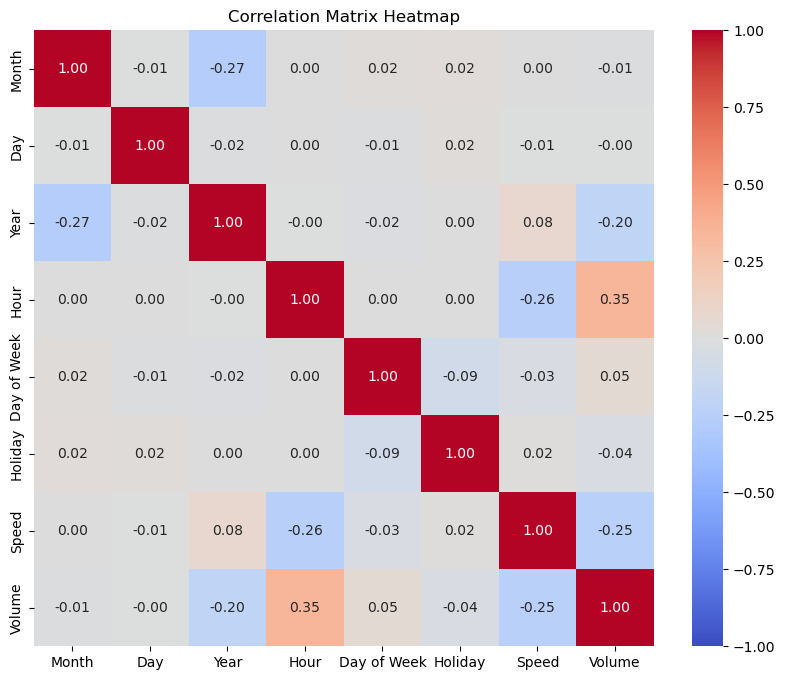

In [15]:
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [17]:
X = data_cleaned[['Speed','Volume','Hour', 'Day of Week', 'Holiday']].values
y = data_cleaned['Direction']

## XGBoost Classifier ( Predicting Direction)

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost Classifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Example prediction for new data
new_data = [[60, 400, 8, 4, 0]]  # Replace with new speed and volume values
predicted_direction = label_encoder.inverse_transform(model.predict(new_data))
print(f"Predicted Direction for {new_data}: {predicted_direction[0]}")

Accuracy: 0.7603

Classification Report:
              precision    recall  f1-score   support

          NB       0.74      0.79      0.77     20749
          SB       0.78      0.73      0.75     20863

    accuracy                           0.76     41612
   macro avg       0.76      0.76      0.76     41612
weighted avg       0.76      0.76      0.76     41612

Predicted Direction for [[60, 400, 8, 4, 0]]: SB


Feature importance

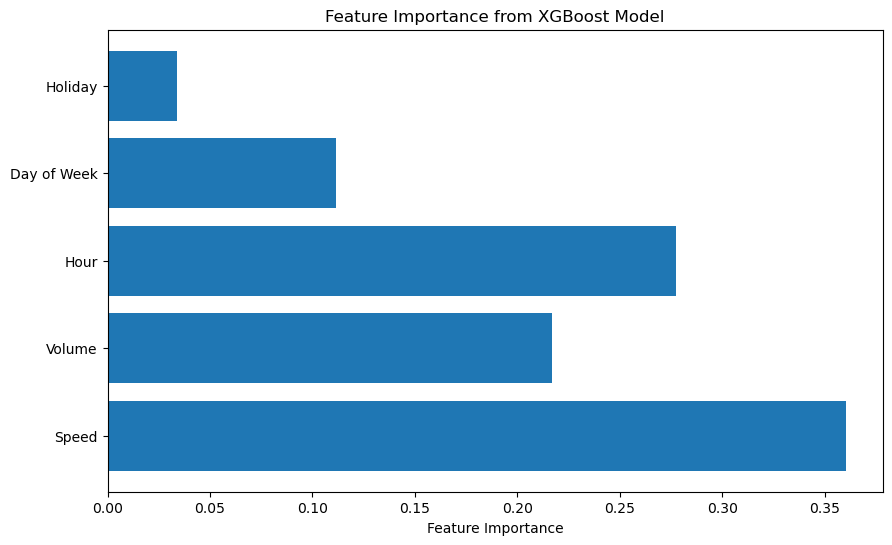

In [21]:

# Get feature importance values
feature_importance = model.feature_importances_

# Define feature names (use the same order as in training)
feature_names = ['Speed', 'Volume', 'Hour', 'Day of Week', 'Holiday']

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost Model')
plt.show()

Example prediction 

In [23]:
new_data = [
    [50, 350, 9, 3, 0],
    [30, 100, 19, 5, 1],
    [65, 450, 15, 1, 0]
]

# Predict directions for the new data
predicted_directions = label_encoder.inverse_transform(model.predict(new_data))
for i, sample in enumerate(new_data):
    print(f"Predicted Direction for {sample}: {predicted_directions[i]}")

Predicted Direction for [50, 350, 9, 3, 0]: SB
Predicted Direction for [30, 100, 19, 5, 1]: NB
Predicted Direction for [65, 450, 15, 1, 0]: SB


In [23]:
data_cleaned

,Road Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume
Full Date,,,,,,,,,,
2021-09-07 23:00:00,BURNET,9,7,2021,23,2,0,NB,42.0,181.0
2021-09-07 23:00:00,BURNET,9,7,2021,23,2,0,SB,44.0,112.0
2021-09-07 22:00:00,BURNET,9,7,2021,22,2,0,NB,41.0,259.0
2021-09-07 22:00:00,BURNET,9,7,2021,22,2,0,SB,43.0,218.0
2021-09-07 21:00:00,BURNET,9,7,2021,21,2,0,NB,41.0,383.0
...,...,...,...,...,...,...,...,...,...,...
2017-08-18 14:00:00,LOOP 360,8,18,2017,14,5,0,SB,40.0,2067.0
2017-08-18 13:00:00,LOOP 360,8,18,2017,13,5,0,NB,50.0,2058.0
2017-08-18 13:00:00,LOOP 360,8,18,2017,13,5,0,SB,40.0,2644.0


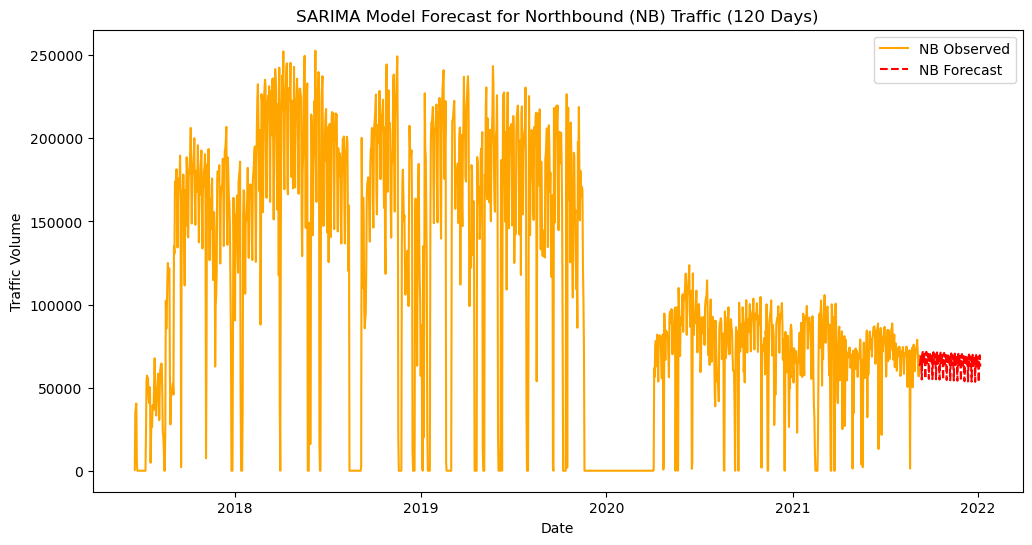

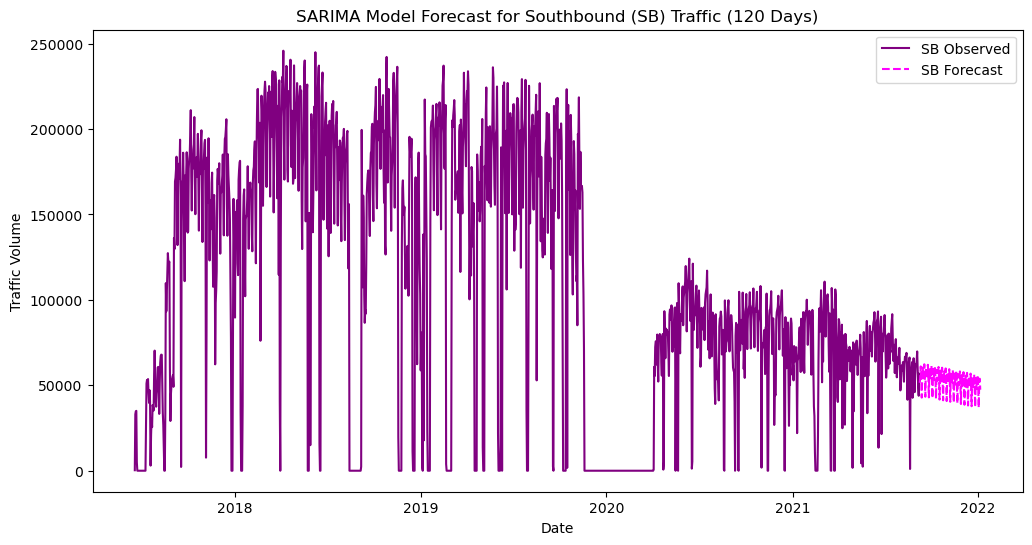

In [25]:
# Filter data by direction
nb_data = data_cleaned[data_cleaned['Direction'] == 'NB']
sb_data = data_cleaned[data_cleaned['Direction'] == 'SB']

# Aggregate daily volumes for each direction
nb_daily_volume = nb_data['Volume'].resample('D').sum()
sb_daily_volume = sb_data['Volume'].resample('D').sum()

# Define SARIMA parameters
order = (1, 1, 1)  # ARIMA order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, s) with weekly seasonality

# Fit SARIMA model for NB
nb_model = SARIMAX(nb_daily_volume, order=order, seasonal_order=seasonal_order)
nb_fitted = nb_model.fit(disp=False)

# Fit SARIMA model for SB
sb_model = SARIMAX(sb_daily_volume, order=order, seasonal_order=seasonal_order)
sb_fitted = sb_model.fit(disp=False)

# Forecast the next 120 days for both directions
nb_forecast = nb_fitted.forecast(steps=120)
sb_forecast = sb_fitted.forecast(steps=120)

# Plot for Northbound (NB) forecast
plt.figure(figsize=(12, 6))
plt.plot(nb_daily_volume, label='NB Observed', color='orange')
plt.plot(nb_forecast, label='NB Forecast', color='red', linestyle='--')
plt.title("SARIMA Model Forecast for Northbound (NB) Traffic (120 Days)")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Plot for Southbound (SB) forecast
plt.figure(figsize=(12, 6))
plt.plot(sb_daily_volume, label='SB Observed', color='purple')
plt.plot(sb_forecast, label='SB Forecast', color='magenta', linestyle='--')
plt.title("SARIMA Model Forecast for Southbound (SB) Traffic (120 Days)")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()